In [ ]:
- title: Занятие 2
- author: Smertyak Nikita
- date: 2023-02-10
- slug: 2023_lab02
- ipynb_url: download/2023_lab02.ipynb

# Библиотека Pandas
В прошлом занятии мы пользовались библиотекой Numpy для анализа данных, а теперь давайте разберёмся с Pandas.

In [1]:
import numpy as np
import pandas as pd

## Объекты класса `pandas.Series`
Серия — это массив NumPy, но с именем и с дополнительной индексацией ячеек: индексами на основе меток (label-based indexing).

Если индексы-метки не указать при создании серии, то по умолчанию они совпадают с порядковыми индексами от 0.

In [2]:
ages = pd.Series([22, 35, 25, 16], name="age")
print(ages)

0    22
1    35
2    25
3    16
Name: age, dtype: int64


Можно явно указать индексы через параметр конструктора `index`:

In [3]:
named_ages = pd.Series(data=[22, 35, 25, 16], index=["Aline", "Beatrice", "Clara", "Diana"], dtype=np.int32, name="age")
print(named_ages)

Aline       22
Beatrice    35
Clara       25
Diana       16
Name: age, dtype: int32


Доступ с квадратными скобками `series[i]` возможен как через числовые индексы, так и по меткам:

In [4]:
named_ages["Beatrice"]

35

In [5]:
named_ages[1]

35

### Сложности двойной индексации и их решение: `loc`, `iloc`, `at`, `iat`
Создадим простую серию с числами и возьмём её срез:

In [6]:
numbers = pd.Series(range(0, 1000, 100))
the_slice = numbers[2:7]
print(the_slice)

2    200
3    300
4    400
5    500
6    600
dtype: int64


Обратите внимание, что после среза индексы-метки остались закреплёнными за своими значениями элементов.
Это правильно с точки зрения *идентификации* хранимых данных. Особенно, если данные про одну сущность будут находиться в разных сериях и потом их нужно будет сопоставлять.

Однако, в результате появляется **неоднозначность индексации**.

Доступ с квадратными скобками теперь работает только по индексам-меткам:

In [7]:
the_slice[2]

200

Если же для такой неоднозначной ситуации взять срез, то мы получим "жёлтую карточку" — предупреждение от Pandas:

In [8]:
the_slice[2:5]

4    400
5    500
6    600
dtype: int64

Как видите, мы получили срез по порядковым индексам, но  *библиотека предупреждает о будущем изменении поведения*: скоро в таких ситуациях будет осуществляться срез по индексам-меткам.

Достоверно доступиться к элементам серии по порядковому индексу можно через **локатор** `iloc`:

In [9]:
the_slice.iloc[2:5]

4    400
5    500
6    600
dtype: int64

А достоверный доступ и срез через индексы-метки мы получим через **локатор** `loc`:

In [10]:
the_slice.loc[2:5]

2    200
3    300
4    400
5    500
dtype: int64

Взгляните! элемент с индексом-меткой 5 включён в срез, что противоречит логике `range(start, stop, step)`.
Почему так?! Подумайте про срезы с метками строкового типа и посмотрите на пример ниже:

In [11]:
named_ages.loc["Beatrice":"Diana"]

Beatrice    35
Clara       25
Diana       16
Name: age, dtype: int32

Если доступ нужен только к одному элементу, то можно вместо `loc` и `iloc` воспользоватсья `at` и `iat`:

In [12]:
the_slice.at[4]

400

In [13]:
the_slice.iat[4]

600

### Добавление данных в серию, удаление
В отличие от массивов NumPy, серии имеют переменный размер:

In [14]:
s = pd.Series(data=[0, 10, 20, 30], index=[1, 2, 3, 4])
print(s)

1     0
2    10
3    20
4    30
dtype: int64


In [15]:
s.pop(1) # удаление элемента с индексом-меткой 1

0

In [16]:
print(s)

2    10
3    20
4    30
dtype: int64


Добавление элементов с присваиванием индекса-метки можно делать через локатор `loc`:

In [17]:
s.loc[5] = 50
print(s)

2    10
3    20
4    30
5    50
dtype: int64


Обратите внимание, что таким добавлением можно нарушить порядок индексов:

In [18]:
s.loc[1] = 100
print(s)

2     10
3     20
4     30
5     50
1    100
dtype: int64


Если индексы-метки нужно пересортировать, можно сделать это при помощи `sort_index`:

In [19]:
s.sort_index(inplace=True)
print(s)

1    100
2     10
3     20
4     30
5     50
dtype: int64


Ещё более курьёзную ситуацию с индексами можно создать при помощи конкатенации серий функцией `pd.concat`:

In [20]:
a = pd.Series(data=[10, 20, 40], index=[1, 2, 4])
b = pd.Series(data=[100, 200, 300], index=[1, 2, 3])
c = pd.concat([a, b])
print(c)

1     10
2     20
4     40
1    100
2    200
3    300
dtype: int64


In [21]:
c.index

Int64Index([1, 2, 4, 1, 2, 3], dtype='int64')

In [22]:
c[1] = 10000
print(c)

1    10000
2       20
4       40
1    10000
2      200
3      300
dtype: int64


Итак, **индексы-метки могут оказаться не уникальными**!!! И присваивание в такую метку приводит к изменению всех значений с этой меткой.

Лучше такой ситуации не создавать. Вот так можно проверить, что метки уникальны:

In [23]:
c.index.is_unique

False

### Редукция серий
Агрегирующие методы по сравнению с массивами `NumPy.ndarray` в сериях переопределены: в них допускаются и просто игнорируются пустые ячейки, которые представлены как `NaN` (Not a Number).

In [24]:
values = [1, 3, 5, np.nan, 1, np.nan, 3]
array = np.array(values)
series = pd.Series(values)

for container in array, series:
    print(type(container))
    print(container.min(), container.max(), container.sum(), container.prod(), sep='\t')

<class 'numpy.ndarray'>
nan	nan	nan	nan
<class 'pandas.core.series.Series'>
1.0	5.0	13.0	45.0


Уникальные значения из серии можно получить методом `unique`. Только нужно понимать, что результат — это уже не серия, а просто массив NumPy, поскольку для массива уникальных значений теряется смысл индексов-меток:

In [25]:
series.unique()

array([ 1.,  3.,  5., nan])

Частотный анализ для значений в серии можно запустить методом `value_counts`:

In [26]:
series.value_counts()

1.0    2
3.0    2
5.0    1
dtype: int64

Для статистической обработки есть большое количество методов:

In [27]:
series.mean()  # среднее арифметическое

2.6

In [28]:
series.std()  # среднеквадратическое отклонение

1.6733200530681511

In [29]:
series.median()  # медиана

3.0

In [30]:
series.quantile(3/4)  # произвольный квантиль, например, 3-я квартиль (число, меньше либо равно которого 75% чисел серии)

3.0

Все функции выше вычислялись только *для содержательных — не пустых* элементов серии. Узнать их количество можно методом `count`:

In [31]:
series.count()  # количество содержательных элементов в серии

5

### Отсутствующие значения в серии
Поскольку в серии допускаются значения `NaN`, которые по-умолчанию не учитываются в статистических функциях, нужно уметь с ними работать:
1. проверять факт их наличия в серии,
2. считать их количество,
3. выбрасывать (`drop`) такие ячейки из серии,
4. массово заменять их на другие значения.

In [32]:
series.isna()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
dtype: bool

In [33]:
series.isna().any()

True

Просуммировав эту серию, мы узнаем количество пустых ячеек (т.к. при арифметическом сложении превращаются: `True` — в `1`, а `False` — в `0`):

In [34]:
series.isna().sum()

2

In [35]:
series.dropna()

0    1.0
1    3.0
2    5.0
4    1.0
6    3.0
dtype: float64

Надо помнить, что метод `dropna`, как и многие другие методы, *не модифицирует текущую серию, а создаёт и возвращает новую*. Поэтому наша серия останется в старом состоянии:

In [36]:
series

0    1.0
1    3.0
2    5.0
3    NaN
4    1.0
5    NaN
6    3.0
dtype: float64

Если мы хотим поменять текущую серию, нужно указать значение ключевого параметра `inplace=True`:

In [37]:
series.dropna(inplace=True)
series

0    1.0
1    3.0
2    5.0
4    1.0
6    3.0
dtype: float64

То же касается метода `fillna` массовой замены значений `NaN` на другое:

In [38]:
series = pd.Series([1, 3, 5, np.nan, 1, np.nan, 3])
series.fillna(0, inplace=True)
series

0    1.0
1    3.0
2    5.0
3    0.0
4    1.0
5    0.0
6    3.0
dtype: float64

### Векторные (массовые операции)
Как и для массивов NumPy для серий работают массовые операции:

In [39]:
A = pd.Series(data=[10, 20, 30, 40], index=["A", "B", "C", "D"])
B = pd.Series(data=[1, 2, 3, 4], index=["A", "B", "C", "D"])

In [40]:
A + B

A    11
B    22
C    33
D    44
dtype: int64

In [41]:
A * B

A     10
B     40
C     90
D    160
dtype: int64

Массовые операции работают не только с двумя сериями, но и с константами:

In [42]:
-A + 25

A    15
B     5
C    -5
D   -15
dtype: int64

In [43]:
A > 20

A    False
B    False
C     True
D     True
dtype: bool

In [44]:
B == 3

A    False
B    False
C     True
D    False
dtype: bool

In [45]:
B != 3

A     True
B     True
C    False
D     True
dtype: bool

Применить какую-то функцию к каждому элементу серии можно при помощи метода `apply`:

In [46]:
B.apply(lambda x: x*100)

A    100
B    200
C    300
D    400
dtype: int64

Значения из одной серии можно *массово скопировать в другую серию* методом `update`, при этом опора будет производиться на индексы-метки, а не на последовательность элементов. При этом для меток старой серии, к которой не найдены метки новой серии, будут оставлены старые значения:

In [47]:
A = pd.Series(data=[100, 200, 500, 0], index=["Aline", "Beatrice", "Clara", "Diana"], name="money")
B = pd.Series(data=[300, 0], index=["Diana", "Aline"])
print(A)
A.update(B)
print(A)

Aline       100
Beatrice    200
Clara       500
Diana         0
Name: money, dtype: int64
Aline         0
Beatrice    200
Clara       500
Diana       300
Name: money, dtype: int64


## Объекты класса DataFrame
После знакомства с сериями `Series` легче понять как формируется лист с данными.
По сути это несколько серий-столбцов с одинаковым индексом по вертикали, а последовательность имён столбцов составляет горизонтальный индекс таблицы.

In [48]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6], "C": [7, 8, 9]},
                  index = ["first", "second", "third"])
df

A  B  C
first   1  4  7
second  2  5  8
third   3  6  9

In [49]:
df.index

Index(['first', 'second', 'third'], dtype='object')

In [50]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

Доступ к сериям-столбцам можно делать через квадратные скобки или через оператор `.` (если имя является допустимым идентификатором):

In [51]:
df['A']

first     1
second    2
third     3
Name: A, dtype: int64

In [52]:
df.A

first     1
second    2
third     3
Name: A, dtype: int64

In [53]:
type(df.A)

pandas.core.series.Series

Однако, отличие в доступе всё-таки есть. Через точку нельзя создать новый столбец:

In [54]:
df.D = df.A*100 + df.B*10 + df.C
df

/home/tkhirianov/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


A  B  C
first   1  4  7
second  2  5  8
third   3  6  9

In [55]:
df['D'] = df.A*100 + df.B*10 + df.C
df

A  B  C    D
first   1  4  7  147
second  2  5  8  258
third   3  6  9  369

In [56]:
df['D']

first     147
second    258
third     369
Name: D, dtype: int64

### Сложности индексации и их решение: loc, iloc.
Квадратные скобки дают как доступ к столбцам, так и, в случае среза — к строкам:

In [57]:
df[1:3]  # срез по порядковым индексам

A  B  C    D
second  2  5  8  258
third   3  6  9  369

In [58]:
df['first':'second']  # срез по индексам-меткам (включая конечную)

A  B  C    D
first   1  4  7  147
second  2  5  8  258

Как вы помните, это может приводить к неоднозначности, поэтому лучше использовать `loc` или `iloc`:

In [59]:
df.iloc[1:3]

A  B  C    D
second  2  5  8  258
third   3  6  9  369

In [60]:
df.loc['first':'second']

A  B  C    D
first   1  4  7  147
second  2  5  8  258

Новая возможность — локатор позволяет получить *серию значений одной строки*. В этом случае индекс строки становится `name` серии:

In [61]:
df.loc['second']

A      2
B      5
C      8
D    258
Name: second, dtype: int64

*Запятая в квадратных скобках* позволяет достать **значение конкретной ячейки** или **срез по строкам и столбцам одновременно**:

In [62]:
df.loc['first', 'A']

1

In [63]:
df.loc['first':'second', 'B':'C']

B  C
first   4  7
second  5  8

Также интересно то, что **локатор в квадратных скобках может принимать список индексов**, причём в произвольном порядке:

In [64]:
df.loc[['third', 'first'], ['D', 'B', 'C']]

D  B  C
third  369  6  9
first  147  4  7

В срезах можно пропускать параметры начала и конца, а также указывать третий параметр — шаг:

In [65]:
df.iloc[:, ::-1]

D  C  B  A
first   147  7  4  1
second  258  8  5  2
third   369  9  6  3

### Редукция столбцов и строк
Очевидно, редукцию одного конкретного столбца или строки с конкретным индексом можно выполнить, предварительно выделив её как `Series`, но есть и возможность массовой редукции по заданной оси:

In [66]:
df.sum(axis=1)  # указываем axis=1 для свёртки по горизонтали

first     159
second    273
third     387
dtype: int64

In [67]:
df.sum()  # по-умолчанию axis=0, свёртка по вертикали

A      6
B     15
C     24
D    774
dtype: int64

In [68]:
df.max()

A      3
B      6
C      9
D    369
dtype: int64

In [69]:
df.idxmax()

A    third
B    third
C    third
D    third
dtype: object

Можно сделать свёртку сразу несколькими функциями при помощи метода `aggregate` (alias `agg`):

In [70]:
df.aggregate(['min', 'idxmin', 'max', 'idxmax', 'mean', 'sum'])

A      B      C      D
min         1      4      7    147
idxmin  first  first  first  first
max         3      6      9    369
idxmax  third  third  third  third
mean      2.0    5.0    8.0  258.0
sum         6     15     24    774

### Чистка данных. Методы `drop` и `dropna`
Исходные данные часто содержат лишнюю информацию, которую требуется исключить. Если нужно сохранить изменения в самой таблице, то следует добавлять параметр `inplace=True`, но сейчас мы этого делать не будем, оставляя лист в его исходном состоянии.

Чтобы отбросить лишние столбцы, используют метод `drop` с ключевым параметром `columns` и списком имён:

In [71]:
df.drop(columns=['B', 'D'])

A  C
first   1  7
second  2  8
third   3  9

Для отбрасывания строк используют метод `drop` с ключевым параметром `labels`:

In [72]:
df.drop(labels=['first'])

A  B  C    D
second  2  5  8  258
third   3  6  9  369

Теперь добавим в лист одну ячейку `NaN`:

In [73]:
df.loc['second', 'C'] = np.nan
df

A  B    C    D
first   1  4  7.0  147
second  2  5  NaN  258
third   3  6  9.0  369

Теперь посмотрите как работает метод `dropna`:

In [74]:
df.dropna()  # по умолчанию выбрасываются все строки, в которых есть хотя бы одно значение NaN

A  B    C    D
first  1  4  7.0  147
third  3  6  9.0  369

In [75]:
df.dropna(axis='columns')  # можно вместо строк с NaN выбросить столбцы:

A  B    D
first   1  4  147
second  2  5  258
third   3  6  369

Кроме стратегии выбрасывания данных есть ещё возможность заполнить пропуски константой:

In [76]:
df.fillna(0)

A  B    C    D
first   1  4  7.0  147
second  2  5  0.0  258
third   3  6  9.0  369

Или, как вариант, заполнить ячейки `NaN` через интерполяцию <sup>[[1]](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F)</sup> по соседним ячейкам серии-столбца:

In [77]:
df.interpolate()

A  B    C    D
first   1  4  7.0  147
second  2  5  8.0  258
third   3  6  9.0  369

## Сложные приёмы обработки данных
Есть некоторые приёмы работы с `DataFrame`, которые позволяют быстро переформатировать данные так, чтобы необходимая информация лежала на поверхности.

Представьте себе ситуацию, когда исходная таблица с данными содержит случаи, которые можно *классифицировать* по нескольким категориям. Например, друзья работали на огороде и собирали картошку и морковку. Вот таблица их "вкладов" в общую корзину:

In [78]:
commits = pd.DataFrame({"name": ["Петя", "Вася", "Таня", "Петя", "Петя", "Таня", "Вася", "Петя", "Таня"],
                        "potatoes": [3, 4, 0, 3, 4, 0, 6, 3, 0],
                        "carrots": [0, 2, 5, 2, 1, 4, 15, 2, 6]})
commits

name  potatoes  carrots
0  Петя         3        0
1  Вася         4        2
2  Таня         0        5
3  Петя         3        2
4  Петя         4        1
5  Таня         0        4
6  Вася         6       15
7  Петя         3        2
8  Таня         0        6

Конечно, мы можем найти суммарное количество картошек и морковок в общей корзине или минимальное/максимальное количество за 1 вклад:

In [79]:
commits.sum()

name        ПетяВасяТаняПетяПетяТаняВасяПетяТаня
potatoes                                      23
carrots                                       37
dtype: object

In [80]:
commits.agg(["min", "max"])

name  potatoes  carrots
min  Вася         0        0
max  Таня         6       15

Однако, имена тут только мешают, не имеют содержательной информации. А хотелось бы узнать статистику по каждому другу отдельно...

### Метод `groupby`
Метод `groupby` осуществляет что-то вроде корзинной сортировки для последующей редукции.

Группировка происходит по уникальным значениям в указанном столбце. Эти значения будут играть роль индекса в новом листе.

In [81]:
commits.groupby("name")  # разложим все вклады по именам вкладчиков

Объект со сгруппированными по указанному столбцу объектами мы и видим, но чтобы его использовать по назначению, требуется агрегировать случаи в каждой группе

In [82]:
commits.groupby("name").sum()  # количество овощей, *сгруппированное* по имени вкладчика:

potatoes  carrots
name                   
Вася        10       17
Петя        13        5
Таня         0       15

Чтобы вычислить несколько статистических функций, можно использовать метод `agg` (синоним `aggregate`).

In [83]:
commits.groupby("name").carrots.aggregate(["min", "max"])  # мин. и макс. количество морковок за один вклад

min  max
name          
Вася    2   15
Петя    0    2
Таня    4    6

Если агрегацию при этом сделать сразу по нескольким числовым столбцам, то у нас получится *двухуровневый индекс* для столбцов:

In [84]:
commits.groupby("name").aggregate(["min", "max"])  # мин. и макс. количество овощей за один вклад

potatoes     carrots    
          min max     min max
name                         
Вася        4   6       2  15
Петя        3   4       0   2
Таня        0   0       4   6

### Сводная таблица `pivot_table`
Иногда нужно осуществить группировку случаев-строк сразу по нескольким категориальным параметрам.

Допустим, участники олимпиады по программированию отправляли задачи в электронный контест. Таблица отправок в систему содержит:

1. `run_id` — идентификатором запуска проверки,
2. `username` — хешем имени пользователя,
3. `problem` — буквой-идентификатором решаемой задачи,
4. `result` — вердиктом проверяющей системы,
5. `tests` — количеством успешно пройденных тестов при запуске,
6. `score` — набранными очками.

In [85]:
runs = pd.read_csv("http://cs.mipt.ru/pydatan_2023/extra/data/olymp3_results.csv", index_col='run_id')
runs.head()

username problem   result  tests  score
run_id                                         
0       ae7ba9eb       B       OK     12    120
1       3470f1fd       A       OK      4    100
2       ae7ba9eb       C       OK     20    120
3       3470f1fd       B  partial     11     11
4       3470f1fd       B       OK     12    119

Обратите внимание, что один и тот же участник мог отправлять задачу много раз.
Допустим, нас интересует максимальное количество очков за каждый вид задачи, причём — отдельно для каждого пользователя.

В этом случае разумно сделать в сводной таблице идентификатор пользователя индексом-меткой строки, а букву-идентфикатор задачи — индексом-меткой столбца. При этом информация из столбцов `result`, `test` и индекса `run_id` нас не интересует совсем — в качестве *значений* нас интересует только `score`:

In [86]:
standings = runs.pivot_table(values="score", index="username", columns="problem", aggfunc="max")
standings  # сводная таблица результатов участников

problem       A      B      C      D      E      F      G
username                                                 
012ebf1a  100.0  119.0  120.0  100.0    NaN    NaN    NaN
04652344  100.0  120.0  120.0   99.0    NaN  200.0  200.0
133bea0b   99.0  119.0  115.0   99.0  149.0  197.0  198.0
144a02e6   99.0  119.0    3.0   99.0  150.0    NaN    2.0
3274f498  100.0  119.0  119.0   99.0  149.0    NaN  197.0
3470f1fd  100.0  119.0  120.0  100.0  149.0  197.0  194.0
4d990bd5    NaN    NaN  120.0    NaN    NaN    NaN    NaN
63590cda    NaN    NaN    0.0    NaN    NaN    NaN    NaN
6bfd137c  100.0  120.0   19.0  100.0    NaN    NaN    NaN
88d40a26  100.0  120.0  120.0  100.0  150.0    NaN  200.0
898693b2  100.0  120.0  120.0   99.0  144.0  198.0  194.0
98920ce6   98.0  120.0  115.0  100.0    NaN    NaN    NaN
9bffce24  100.0  120.0  120.0  100.0  149.0    NaN  197.0
ae7ba9eb    NaN  120.0  120.0   99.0  148.0  199.0  193.0
b5f8b678  100.0  120.0  112.0  100.0  149.0    NaN  199.0
baee5b3d  100.0  119.0  120.0   99.0  148.0  197.0  194.0
bf376a59  100.0  120.0  119.0   99.0    3.0  200.0  200.0
bfd5e77e  100.0  120.0  120.0  100.0  150.0    NaN    NaN
c0065bd3   98.0  120.0    NaN   49.0  150.0    NaN    NaN
cbd1e30b   99.0  120.0  120.0   99.0    NaN  200.0  190.0
cdd8d075  100.0  119.0  120.0   98.0  150.0  200.0    NaN
d4b7e0db  100.0    NaN    NaN    NaN    NaN    NaN    NaN
f5df05d6   97.0  118.0  113.0  100.0    NaN    NaN    NaN
f832dae3   98.0  120.0  120.0   99.0  148.0  200.0  199.0

Из пожеланий к этой таблице результатов:

In [87]:
# 1. Заменить `NaN` на 0.
standings.fillna(0, inplace=True)  # можно было указать fill_value=0 для pivot_table
standings.head(3)

problem       A      B      C      D      E      F      G
username                                                 
012ebf1a  100.0  119.0  120.0  100.0    0.0    0.0    0.0
04652344  100.0  120.0  120.0   99.0    0.0  200.0  200.0
133bea0b   99.0  119.0  115.0   99.0  149.0  197.0  198.0

In [88]:
# 2. В последнем столбце `score` посчитать сумму
#    максимальных достигнутых баллов для каждого пользователя.
standings["score"] = standings.sum(axis=1)
standings.head(3)

problem       A      B      C      D      E      F      G  score
username                                                        
012ebf1a  100.0  119.0  120.0  100.0    0.0    0.0    0.0  439.0
04652344  100.0  120.0  120.0   99.0    0.0  200.0  200.0  839.0
133bea0b   99.0  119.0  115.0   99.0  149.0  197.0  198.0  976.0

In [89]:
# 3. Отсортировать по убыванию `score` все строки таблицы.
standings.sort_values(by="score", ascending=False, inplace=True)
standings.head(3)  # лучшие по сумме баллов 3 участника олимпиады:

problem       A      B      C      D      E      F      G  score
username                                                        
f832dae3   98.0  120.0  120.0   99.0  148.0  200.0  199.0  984.0
3470f1fd  100.0  119.0  120.0  100.0  149.0  197.0  194.0  979.0
baee5b3d  100.0  119.0  120.0   99.0  148.0  197.0  194.0  977.0

### Разворачивание сводной таблицы `melt`
**Обратное преобразование из сводной таблицы в таблицу случаев невозможно!**

Это очевидно, поскольку:
1. при подготовке сводной таблицы производилась агрегация (редукция серии чисел к одному числу),
2. часть столбцов, не относящаяся к `values`, игнорировалась.

Однако, можно развернуть ту небольшую статистическую выжимку, которая у нас осталась.
Для таблицы результатов олимпиады это будут только лучшие отправки по каждому пользователю и задаче:

In [90]:
standings.reset_index().melt(id_vars=['username'], value_vars=['A', 'B', 'C', 'C', 'E', 'F', 'G'])

username problem  value
0    f832dae3       A   98.0
1    3470f1fd       A  100.0
2    baee5b3d       A  100.0
3    133bea0b       A   99.0
4    898693b2       A  100.0
..        ...     ...    ...
139  c0065bd3       G    0.0
140  6bfd137c       G    0.0
141  4d990bd5       G    0.0
142  d4b7e0db       G    0.0
143  63590cda       G    0.0

[144 rows x 3 columns]

Замечание. Для того, чтобы использовать `username` в качестве `id_vars` пришлось вначале убрать его из индекса в обычный столбец при помощи `reset_index()`.

## Слияние данных из нескольких таблиц
Иногда данные о случаях или объектах содержатся в нескольких таблицах, при этом в каждой таблице есть своя специфика.

### Конкатенация таблиц `concat` 
При использовании конкатенации происходит механическое прибавление строк второй таблицы к строкам первой таблицы:

In [91]:
scores1 = pd.DataFrame({'login':  ['login1', 'login2', 'login3'],
                        'A': [2, 0, 5], 'B': [5, 3, 5], 'C': [5, 3, 5],})
scores1

login  A  B  C
0  login1  2  5  5
1  login2  0  3  3
2  login3  5  5  5

In [92]:
scores2 = pd.DataFrame({'login':  ['login4', 'login5'],
                        'A': [1, 3], 'B': [3, 0], 'C': [4, 2]})
scores2

login  A  B  C
0  login4  1  3  4
1  login5  3  0  2

In [93]:
scores = pd.concat([scores1, scores2])
scores

login  A  B  C
0  login1  2  5  5
1  login2  0  3  3
2  login3  5  5  5
0  login4  1  3  4
1  login5  3  0  2

In [94]:
# можно было при pd.concat() добавить ignore_index=True,
# но можно и починить поломанный индекс вручную (методом его отбрасывания):
scores.reset_index(inplace=True)
scores.drop(columns=["index"], inplace=True)
scores

login  A  B  C
0  login1  2  5  5
1  login2  0  3  3
2  login3  5  5  5
3  login4  1  3  4
4  login5  3  0  2

Возможна и другая конкатенация — по горизонтали (`axis=1`):

In [95]:
scores3 = pd.DataFrame({'login':  ['login2', 'login5', 'login6'],
                        'D': [8, 2, 7], 'E': [3, 0, 10]})
scores3

login  D   E
0  login2  8   3
1  login5  2   0
2  login6  7  10

In [96]:
pd.concat([scores, scores3], axis=1)

login  A  B  C   login    D     E
0  login1  2  5  5  login2  8.0   3.0
1  login2  0  3  3  login5  2.0   0.0
2  login3  5  5  5  login6  7.0  10.0
3  login4  1  3  4     NaN  NaN   NaN
4  login5  3  0  2     NaN  NaN   NaN

Осторожно!!! Обратите внимание, что теперь сломана сама логика объединения, так при соединении нужно учитывать равенство `login`.

### Объединение таблиц при помощи `merge`
Вместо функции `pd.concat()` давайте применим метод `merge`:

In [97]:
scores.merge(scores3)

login  A  B  C  D  E
0  login2  0  3  3  8  3
1  login5  3  0  2  2  0

У нас правильное соединились данные! Но есть нюанс в том, *как* это произошло.

Мы не указали `merge()` никаких значений параметров, а параметр `how` по умолчанию равен `'inner'`. Эта стратегия — взять только те строки, где есть полнота данных и слева, и справа. За ключи объединения берутся столбцы с одинаковыми названиями в обеих таблицах (у нас это `login`).

Вот и получается, что при `how='inner'` **в пересечении множеств ключей** (по значениями столбца `login`) только два: `login2` и `login5`.

Есть ещё 4 стратегии объединения:

In [98]:
# `left`: сохранить всё из левой таблицы,
# информация из правой -- при совпадении ключей
scores.merge(scores3, how='left')

login  A  B  C    D    E
0  login1  2  5  5  NaN  NaN
1  login2  0  3  3  8.0  3.0
2  login3  5  5  5  NaN  NaN
3  login4  1  3  4  NaN  NaN
4  login5  3  0  2  2.0  0.0

In [99]:
# `right`: сохранить всё из правой таблицы,
# информация из левой -- при совпадении ключей
scores.merge(scores3, how='right')

login    A    B    C  D   E
0  login2  0.0  3.0  3.0  8   3
1  login5  3.0  0.0  2.0  2   0
2  login6  NaN  NaN  NaN  7  10

In [100]:
#`outer`: использует объединение ключей из обеих таблиц,
# сохранены все ключи и вся информация из обеих таблиц,
# зато пустые ячейки теперь есть во всех столбцах...
scores.merge(scores3, how='outer')

login    A    B    C    D     E
0  login1  2.0  5.0  5.0  NaN   NaN
1  login2  0.0  3.0  3.0  8.0   3.0
2  login3  5.0  5.0  5.0  NaN   NaN
3  login4  1.0  3.0  4.0  NaN   NaN
4  login5  3.0  0.0  2.0  2.0   0.0
5  login6  NaN  NaN  NaN  7.0  10.0

Стратегия слияния `how='cross'` создает *декартово произведение* данных из обеих таблиц.
Для таблиц выше это не имеет смысла, поэтому приведём другой пример.

Есть юноши и девушки, для которых мы хотим вычислить степень их сходства:

In [101]:
boys = pd.DataFrame({'name':  ['Петр', 'Василий', 'Тихон'],
                     'height': [183, 157, 172], 'weight': [78, 65, 95]})
boys

name  height  weight
0     Петр     183      78
1  Василий     157      65
2    Тихон     172      95

In [102]:
girls = pd.DataFrame({'name':  ['Мария', 'Наталья', 'Ирина'],
                      'height': [173, 164, 154], 'weight': [81, 62, 52]})
girls

name  height  weight
0    Мария     173      81
1  Наталья     164      62
2    Ирина     154      52

In [103]:
pairs = boys.merge(girls, how='cross')
pairs

name_x  height_x  weight_x   name_y  height_y  weight_y
0     Петр       183        78    Мария       173        81
1     Петр       183        78  Наталья       164        62
2     Петр       183        78    Ирина       154        52
3  Василий       157        65    Мария       173        81
4  Василий       157        65  Наталья       164        62
5  Василий       157        65    Ирина       154        52
6    Тихон       172        95    Мария       173        81
7    Тихон       172        95  Наталья       164        62
8    Тихон       172        95    Ирина       154        52

Допустим, мы считаем пару подходящей, если юноша выше девушки, но не более, чем на 20 сантиметров, а её вес меньше его хотя бы на 5 кг:

In [104]:
pairs["match"] = (abs(pairs.height_x - pairs.height_y - 10) <= 10) & (pairs.weight_x >= pairs.weight_y + 5)
pairs

name_x  height_x  weight_x   name_y  height_y  weight_y  match
0     Петр       183        78    Мария       173        81  False
1     Петр       183        78  Наталья       164        62   True
2     Петр       183        78    Ирина       154        52  False
3  Василий       157        65    Мария       173        81  False
4  Василий       157        65  Наталья       164        62  False
5  Василий       157        65    Ирина       154        52   True
6    Тихон       172        95    Мария       173        81  False
7    Тихон       172        95  Наталья       164        62   True
8    Тихон       172        95    Ирина       154        52   True

Осталось взять из таблицы только подходящие пары, а затем выбросить и сам столбец `match`:

In [105]:
# в квадратных скобках можно использовать логическую серию
matched = pairs[pairs.match].drop(columns=['match'])
matched

name_x  height_x  weight_x   name_y  height_y  weight_y
1     Петр       183        78  Наталья       164        62
5  Василий       157        65    Ирина       154        52
7    Тихон       172        95  Наталья       164        62
8    Тихон       172        95    Ирина       154        52

Теперь ясно кого с кем нужно пробовать поженить :-)

### Объединение таблиц при помощи `join`
Метод `join` очень похож на `merge`, но отличается поведением по умолчанию:
1. При отсутствии ключевого параметра `on=` для объединения используются индексы.
2. При отсутствии ключевого параметра `how=` выбирается стратегия `'left'`.

In [106]:
boys.join(girls, lsuffix='_of_boy', rsuffix='_of_girl')

name_of_boy  height_of_boy  weight_of_boy name_of_girl  height_of_girl  \
0        Петр            183             78        Мария             173   
1     Василий            157             65      Наталья             164   
2       Тихон            172             95        Ирина             154   

   weight_of_girl  
0              81  
1              62  
2              52

Если вы сталкивались с реляционными базами данных, то упомянутые стратегии `merge` напоминают вам стратегии `JOIN` в SQL.

Листы с данными типа `DataFrame` имеют сходство с таблицами реляционных SQL баз данных, хотя есть и отличия:

| SQL таблица               | Pandas DataFrame                                        |
| :------------------------ | :------------------------------------------------------ |
| столбцы с именами         | столбцы с индексами-метками                             |
| столбцы со строгим типом  | столбцы типизированные (почти всегда)                   |
| порядок строк не задан    | порядок строк определён, можно сорировать               |
| доступ к строке по ключу  | доступ к строке по индексу-метке или числовому индексу  |
| первичный ключ уникален   | индекс-метка может быть не уникальна                    |

## Мастер-класс по анализу данных
Проанализируем данные из системы Яндекс.Контест по домашней работе к лекциям №1 и №2 с помощью бибилиотеки Pandas.

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

Для начала загрузим данные по 1-му домашнему заданию и посмотрим на начало таблицы:

In [108]:
df_res1 = pd.read_csv("http://cs.mipt.ru/pydatan_2023/extra/data/result_lec01.csv")
df_res1.head()

Unnamed: 0 place 1(Быстрая черепашка) 2(Вопрос о фигуре) 3(Послание )  \
0           0     1                    +                  +            +   
1           1     2                    +                  +            +   
2           2     3                    +                  +            +   
3           3     4                    +                  +            +   
4           4     5                    +                  +            +   

  4(Построй дом!) 5(Звездочный квадрат)  Score  Penalty  \
0               +                     +      5       21   
1               +                     +      5       31   
2               +                     +      5       35   
3               +                     +      5       55   
4               +                     +      5       64   

                                          department  \
0                                          Не из МГУ   
1                               Физический факультет   
2                  Механико-математический факультет   
3  Факультет вычислительной математики и кибернетики   
4                  Механико-математический факультет   

                                       hash  
0  b6a720e40da936c330e1f53680b279381d1c5742  
1  57bd006a9261c889d76cba7537a3b61671cbcc6a  
2  0b7a6e627adeb9d50c5ecb7b5a17ea452ec87659  
3  c22dc82f7e88a8973a18180d85d5a3b0cf641b75  
4  1ac42c1757e5790d220299fbe51540beda8b1d8a

Иногда бывает полезно посмотреть на хвост файла (иногда там может быть "грязь"):

In [109]:
df_res1.tail(3)

Unnamed: 0    place 1(Быстрая черепашка) 2(Вопрос о фигуре) 3(Послание )  \
775         775  686-778                  NaN                NaN          NaN   
776         776  686-778                  NaN                NaN          NaN   
777         777  686-778                  NaN                NaN          NaN   

    4(Построй дом!) 5(Звездочный квадрат)  Score  Penalty  \
775             NaN                   NaN      0        0   
776             NaN                   NaN      0        0   
777             NaN                   NaN      0        0   

                                            department  \
775  Факультет вычислительной математики и кибернетики   
776                            Экономический факультет   
777                  Механико-математический факультет   

                                         hash  
775  37a4fc4c4aeecdce528d4af480504b3c45f06183  
776  e401a55b1c215efa29bfd019d006ba2aa56eae62  
777  cc51b85ae5bf898223fe9813c8402f3d272feb6d

Посмотрим ещё раз на все названия столбцов:

In [110]:
df_res1.columns

Index(['Unnamed: 0', 'place', '1(Быстрая черепашка)', '2(Вопрос о фигуре)',
       '3(Послание )', '4(Построй дом!)', '5(Звездочный квадрат)', 'Score',
       'Penalty', 'department', 'hash'],
      dtype='object')

Удаляем колонки, которые нам не пригодятся для дальнейшего анализа:

In [111]:
df_res1.drop(['Unnamed: 0', 'place', 'Penalty'], axis = 1, inplace=True)
df_res1.shape

(778, 8)

Строк всего 778, а колонок всего 8. Переименуем колонки для дальнейшей работы:

In [112]:
column_names = df_res1.columns
df_res1.columns = [col_name.lower().replace(')', '').replace('(', '_').replace(' ', '_') for col_name in column_names]
df_res1.columns

Index(['1_быстрая_черепашка', '2_вопрос_о_фигуре', '3_послание_',
       '4_построй_дом!', '5_звездочный_квадрат', 'score', 'department',
       'hash'],
      dtype='object')

Запросим более подробную информацию о колонках датасета: название, количество непустых ячеек, тип значений.

In [113]:
df_res1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   1_быстрая_черепашка   686 non-null    object
 1   2_вопрос_о_фигуре     685 non-null    object
 2   3_послание_           675 non-null    object
 3   4_построй_дом!        671 non-null    object
 4   5_звездочный_квадрат  667 non-null    object
 5   score                 778 non-null    int64 
 6   department            734 non-null    object
 7   hash                  778 non-null    object
dtypes: int64(1), object(7)
memory usage: 48.8+ KB


Факультет — это категориальный признак. Распечатаем уникальные значения по столбцу `department`:

In [114]:
df_res1['department'].unique()

array(['Не из МГУ', 'Физический факультет',
       'Механико-математический факультет',
       'Факультет вычислительной математики и кибернетики',
       'Химический факультет', 'Экономический факультет',
       'Высшая школа современных социальных наук',
       'Факультет космических исследований', 'Геологический факультет',
       'Факультет фундаментальной медицины',
       'Факультет фундаментальной физико-химической инженерии',
       'Факультет журналистики', nan,
       'Факультет биоинженерии и биоинформатики',
       'Географический факультет', 'Высшая школа государственного аудита',
       'Философский факультет', 'Факультет почвоведения',
       'Факультет психологии', 'Исторический факультет',
       'Биологический факультет', 'Факультет государственного управления',
       'Социологический факультет', 'Факультет глобальных процессов',
       'Биотехнологический факультет', 'Институт стран Азии и Африки',
       'Факультет иностранных языков и регионоведения',
       'Фило

Давайте посчитаем количество студентов по факультетам:

In [115]:
df_res1['department'].value_counts()

Факультет вычислительной математики и кибернетики                     120
Экономический факультет                                               108
Физический факультет                                                   82
Механико-математический факультет                                      62
Химический факультет                                                   57
Не из МГУ                                                              37
Биологический факультет                                                31
Географический факультет                                               27
Социологический факультет                                              26
Факультет почвоведения                                                 22
Геологический факультет                                                21
Факультет космических исследований                                     15
Исторический факультет                                                 14
Факультет биоинженерии и биоинформатик

Проверим, есть ли студенты, не заполнившие свой факультет:

In [116]:
df_res1['department'].isna().sum()

44

Их всего лишь 44 человека. Давайте посмотрим на них внимательно:

In [117]:
df_res1[df_res1.department.isna()]

1_быстрая_черепашка 2_вопрос_о_фигуре 3_послание_ 4_построй_дом!  \
45                    +                 +           +              +   
84                   +3                 +           +             +1   
103                   +                +1           +              +   
119                   +                 +           +             +1   
132                   +                 +           +              +   
167                   +                 +           +              +   
204                   +                +1           +             +1   
215                   +                 +           +              +   
234                   +                +1          +2              +   
258                   +                +1          +2              +   
278                  +1                 +           +             +3   
344                   +                 +          +1              +   
352                  +2                 +           +              +   
360                   +                 +           +              +   
389                   +                 +           +              +   
399                   +                 +          +2             +1   
414                   +                +1           +             +2   
418                   +                 +           +              +   
427                   +                 +          +1              +   
438                   +                 +           +              +   
465                   +                 +           +              +   
489                   +                 +           +             +1   
495                  +1                 +           +              +   
499                   +                +2           +             +2   
503                   +                 +           +              +   
504                   +                +1           +             +1   
511                   +                 +          +1             +6   
571                   +                 +           +              +   
583                   +                 +          +1             +1   
584                   +                 +           +              +   
585                   +                 +           +              +   
598                  +3                +2           +              +   
608                   +                 +          +1              +   
631                   +                 +          +1              +   
662                   +                -3           +             +1   
679                   +                 +         NaN            NaN   
683                  +1                -3         NaN            NaN   
714                 NaN               NaN         NaN            NaN   
733                 NaN               NaN         NaN            NaN   
734                 NaN               NaN         NaN            NaN   
745                 NaN               NaN         NaN            NaN   
747                 NaN               NaN         NaN            NaN   
766                 NaN               NaN         NaN            NaN   
768                 NaN               NaN         NaN            NaN   

    5_звездочный_квадрат  score department  \
45                     +      5        NaN   
84                    +1      5        NaN   
103                    +      5        NaN   
119                    +      5        NaN   
132                    +      5        NaN   
167                    +      5        NaN   
204                    +      5        NaN   
215                    +      5        NaN   
234                    +      5        NaN   
258                  +12      5        NaN   
278                    +      5        NaN   
344                    +      5        NaN   
352                    +      5        NaN   
360                    +      5        NaN   
389                   +2      5        NaN   
399                   +3   

К сожалению, эти не все безответственные товарищи являются виртуальными — только 7 из них не решили ни одной задачи. Но мы всё равно удалим их из нашей таблицы и на всякий случай сбросим индексы:

In [118]:
df_res1.dropna(subset=['department'], axis=0, inplace=True)
df_res1.reset_index(inplace=True)
df_res1.drop(columns=['index'], inplace=True)

Добавим визуализацию количества студентов по факультетам:

<AxesSubplot:>

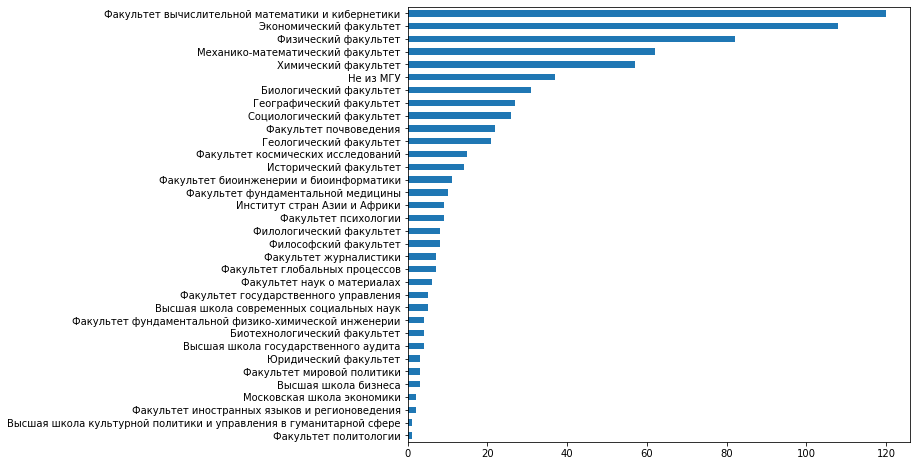

In [119]:
df_res1['department'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(9, 8))

Теперь нужно сделать удобным анализ информации о задачах. 

In [120]:
df_res1["1_быстрая_черепашка"].dtypes

dtype('O')

`dtype('O')` означает, что у них "объектный тип", а значит (в нашем случае) — строковый `str` либо `float('NaN')`.

Кроме того, эти ячейки сейчас имеют следующий формат:

- `+n` — задача сдана (число — это количество посылок в систему)
- `-n` — решение задачи неверное (число — это количество посылок в систему)
- `пустое значение` — задача не решалась

Заменим пустые ячейки и значения с минусом на 0, а затем все значения с плюсом на 1.

In [121]:
df_res1.fillna('-', inplace=True)
df_res1.sample(5)  # случайная выборка 5 строк из таблицы

1_быстрая_черепашка 2_вопрос_о_фигуре 3_послание_ 4_построй_дом!  \
435                   +                 +           +              +   
545                   +                 +           +              +   
594                   +                 +           +              +   
676                   -                 -           -              -   
184                   +                 +           +              +   

    5_звездочный_квадрат  score                         department  \
435                    +      5  Механико-математический факультет   
545                    +      5                          Не из МГУ   
594                    +      5           Географический факультет   
676                    -      0               Физический факультет   
184                    +      5           Филологический факультет   

                                         hash  
435  bf820ce9948fb0d2a190aab2e2d51d5dc3b8d966  
545  d3d2d3b1a0092f0acf73d0ed02f979785cb7832e  
594  9d51beff68445f7605d8078ecf9671924b08244a  
676  9dd00cfba45f1062635bcdcb26478899ed8f71a1  
184  c793f35cd159dc8069e7f2d3ea0c00bce5e5c7cd

Дли приведения ячеек о сдачах к числовому формату (1 — сдана, 0 — не сдана) определим следующую преобразующую функцию:

In [122]:
def task_is_solved(result):
    if result[0] == '+':
        return 1
    else:
        return 0

Применим её ко всем значениям из первых 5 столбцов:

In [123]:
for column in df_res1.columns[:5]:
    df_res1[column] = df_res1[column].apply(func=task_is_solved)
df_res1.head()

1_быстрая_черепашка  2_вопрос_о_фигуре  3_послание_  4_построй_дом!  \
0                    1                  1            1               1   
1                    1                  1            1               1   
2                    1                  1            1               1   
3                    1                  1            1               1   
4                    1                  1            1               1   

   5_звездочный_квадрат  score  \
0                     1      5   
1                     1      5   
2                     1      5   
3                     1      5   
4                     1      5   

                                          department  \
0                                          Не из МГУ   
1                               Физический факультет   
2                  Механико-математический факультет   
3  Факультет вычислительной математики и кибернетики   
4                  Механико-математический факультет   

                                       hash  
0  b6a720e40da936c330e1f53680b279381d1c5742  
1  57bd006a9261c889d76cba7537a3b61671cbcc6a  
2  0b7a6e627adeb9d50c5ecb7b5a17ea452ec87659  
3  c22dc82f7e88a8973a18180d85d5a3b0cf641b75  
4  1ac42c1757e5790d220299fbe51540beda8b1d8a

In [124]:
# импорт модулей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Поработаем с несколькими небольшими датасетами

In [125]:
# !wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/seminars/grades.csv

In [126]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/seminars/grades.csv', 
                 sep=',', 
                 index_col=0)

In [127]:
# вывести голову таблицы
df.head(5)

hash    0    1    2    3    4    5    6    7    8
0  cbe32a2a1b  0.8  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
1  caa93590ad  0.2  0.2  0.9  0.7  0.0  0.0  0.0  0.0  0.0
2  5bbe47f96d  0.8  1.0  1.0  1.0  1.0  0.0  0.5  0.0  0.0
3  3f187965b9  0.0  0.0  0.8  1.0  0.5  0.0  0.0  0.0  0.0
4  bf1e56e185  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [128]:
# вывести хвост таблицы
df.tail()

hash    0    1    2    3    4    5    6    7    8
33  c11c124eb9  0.0  1.0  1.0  0.8  0.5  0.5  0.0  0.0  0.7
34  8b4c1af94b  0.8  1.0  1.0  1.0  0.5  0.0  0.5  0.0  0.7
35  e1388f2aae  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
36  ee55242421  0.8  1.0  0.0  0.7  0.0  1.0  0.0  0.9  0.0
37  d6c40a7f4b  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [129]:
# выбрать 5 случайных строк
df.sample(n=5)

hash    0    1    2    3    4    5    6    7    8
22  ca49cc7265  0.8  0.9  0.0  0.0  0.5  0.5  0.0  1.0  0.6
20  6588f97aea  0.0  0.6  1.0  1.0  1.0  0.5  0.0  0.0  0.7
24  8f67295cb3  0.8  1.0  1.0  0.0  0.5  0.0  0.0  0.0  0.7
2   5bbe47f96d  0.8  1.0  1.0  1.0  1.0  0.0  0.5  0.0  0.0
10  f9f854aa44  1.0  0.9  0.0  0.5  0.5  0.0  0.0  0.0  0.0

In [130]:
# выбрать 30% случайных строк
df.sample(frac=0.3)

hash    0    1    2    3    4    5    6    7    8
0   cbe32a2a1b  0.8  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
6   2a5a018502  0.9  1.0  1.0  1.0  0.8  0.0  0.5  0.0  0.7
4   bf1e56e185  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   3f187965b9  0.0  0.0  0.8  1.0  0.5  0.0  0.0  0.0  0.0
27  237fe82b6f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
25  cb9dfc5d66  0.8  1.0  1.0  1.0  0.5  0.2  0.5  0.9  0.7
37  d6c40a7f4b  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
14  a2d96fe1d4  0.0  0.7  1.0  1.0  0.0  0.0  0.0  0.0  0.0
17  bae2523189  0.8  1.0  0.5  1.0  0.5  0.5  0.5  0.0  0.6
22  ca49cc7265  0.8  0.9  0.0  0.0  0.5  0.5  0.0  1.0  0.6
7   99fe117fcb  0.8  0.0  1.0  0.9  1.0  1.0  0.5  0.0  0.0

In [131]:
# выбрать 5 строк с наибольшими значениями в столбцах '3', '4'
df.nlargest(n=5, columns=['3', '4'])

hash    0    1    2    3    4    5    6    7    8
0   cbe32a2a1b  0.8  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
2   5bbe47f96d  0.8  1.0  1.0  1.0  1.0  0.0  0.5  0.0  0.0
15  7174532c74  0.2  0.9  1.0  1.0  1.0  0.0  0.0  0.0  0.0
20  6588f97aea  0.0  0.6  1.0  1.0  1.0  0.5  0.0  0.0  0.7
6   2a5a018502  0.9  1.0  1.0  1.0  0.8  0.0  0.5  0.0  0.7

In [132]:
# подсчитать количество уникальных значений в столбце 3
df['3'].nunique()

7

In [133]:
# подсчитать сколько раз встретилось в столбце '3' каждое уникальное значение
df['3'].value_counts()

1.0    20
0.0     8
0.7     4
0.5     3
0.9     1
0.2     1
0.8     1
Name: 3, dtype: int64

In [134]:
# склеить две таблицы по строкам
df1 = df.iloc[:5]
df2 = df.iloc[10:15]
pd.concat([df1, df2])

hash    0    1    2    3    4    5    6    7    8
0   cbe32a2a1b  0.8  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
1   caa93590ad  0.2  0.2  0.9  0.7  0.0  0.0  0.0  0.0  0.0
2   5bbe47f96d  0.8  1.0  1.0  1.0  1.0  0.0  0.5  0.0  0.0
3   3f187965b9  0.0  0.0  0.8  1.0  0.5  0.0  0.0  0.0  0.0
4   bf1e56e185  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
10  f9f854aa44  1.0  0.9  0.0  0.5  0.5  0.0  0.0  0.0  0.0
11  6346ddfdb5  0.0  1.0  1.0  0.0  0.5  0.0  0.5  0.0  0.7
12  b5c2ae4623  0.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.6
13  15360bcc4c  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
14  a2d96fe1d4  0.0  0.7  1.0  1.0  0.0  0.0  0.0  0.0  0.0

In [135]:
# склеить две таблицы по столбцам
df1 = df[['hash', '1']]
df2 = df[['3', '4']]
pd.concat([df1, df2], axis=1).head()

hash    1    3    4
0  cbe32a2a1b  1.0  1.0  1.0
1  caa93590ad  0.2  0.7  0.0
2  5bbe47f96d  1.0  1.0  1.0
3  3f187965b9  0.0  1.0  0.5
4  bf1e56e185  0.0  0.0  0.0

### DataFrame.merge - объединение таблиц (аналог SQL: JOIN)

In [149]:
# таблица с оценками
df_grades = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/seminars/grades.csv', 
                        sep=',', index_col=0)
df_grades.head()

hash    0    1    2    3    4    5    6    7    8
0  cbe32a2a1b  0.8  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
1  caa93590ad  0.2  0.2  0.9  0.7  0.0  0.0  0.0  0.0  0.0
2  5bbe47f96d  0.8  1.0  1.0  1.0  1.0  0.0  0.5  0.0  0.0
3  3f187965b9  0.0  0.0  0.8  1.0  0.5  0.0  0.0  0.0  0.0
4  bf1e56e185  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [150]:
# # таблица хэшей: ФИО студента <-> хэш
# !wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/seminars/hashes.csv

In [151]:
df_hashes = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/seminars/hashes.csv')
df_hashes.head()

Группа     Фамилия      Имя     Отчество        hash
0  БПМ-161     Антонов  Алексей   Алексеевич  6875ba52f0
1  БПМ-161  Арсамакова    Алина  Ибрагимовна  7ca01c996f
2  БПМ-161     Богатов    Антон      Юрьевич  15360bcc4c
3  БПМ-161      Бычков   Андрей            -  f9f854aa44
4  БПМ-161    Высоцкий     Яков   Михайлович  1d1d05c257

In [152]:
df_grades.hash.nunique()

38

In [153]:
df_hashes.hash.nunique()

95

In [154]:
# присоединить подходящие строки из df_grades к df_hashes
df = pd.merge(df_hashes, df_grades, on='hash', how='left')
print(df.shape)
df.head(10)

(95, 14)


Группа     Фамилия        Имя       Отчество        hash    0    1    2  \
0  БПМ-161     Антонов    Алексей     Алексеевич  6875ba52f0  0.0  0.9  0.0   
1  БПМ-161  Арсамакова      Алина    Ибрагимовна  7ca01c996f  0.5  0.8  0.5   
2  БПМ-161     Богатов      Антон        Юрьевич  15360bcc4c  0.0  0.0  0.0   
3  БПМ-161      Бычков     Андрей              -  f9f854aa44  1.0  0.9  0.0   
4  БПМ-161    Высоцкий       Яков     Михайлович  1d1d05c257  NaN  NaN  NaN   
5  БПМ-161   Галигеров  Владислав      Сергеевич  738b683ed7  NaN  NaN  NaN   
6  БПМ-161    Гончаров       Глеб       Игоревич  3f187965b9  0.0  0.0  0.8   
7  БПМ-161   Городилов       Илья       Игоревич  6df2f31eb9  NaN  NaN  NaN   
8  БПМ-161     Дудинов      Тимур      Батырович  e1388f2aae  0.0  0.5  0.0   
9  БПМ-161      Иванов      Артём  Владиславович  a2d96fe1d4  0.0  0.7  1.0   

     3    4    5    6    7    8  
0  0.5  0.5  0.0  0.0  0.0  0.0  
1  0.5  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.5  0.5  0.0  0.0  0.0  0.0  
4  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  
6  1.0  0.5  0.0  0.0  0.0  0.0  
7  NaN  NaN  NaN  NaN  NaN  NaN  
8  0.0  0.0  0.0  0.0  0.0  0.0  
9  1.0  0.0  0.0  0.0  0.0  0.0

In [155]:
# присоединить подходящие строки из df_hashes к df_grades
df = pd.merge(df_hashes, df_grades, on='hash', how='right')
print(df.shape)
df.head(10)

(38, 14)


Группа      Фамилия        Имя     Отчество        hash    0    1    2  \
0  БПМ-162       Сучков     Даниил   Викторович  cbe32a2a1b  0.8  1.0  1.0   
1  БПМ-161  Хмельницкий     Даниил  Анатольевич  caa93590ad  0.2  0.2  0.9   
2  БПМ-162        Углов       Егор   Алексеевич  5bbe47f96d  0.8  1.0  1.0   
3  БПМ-161     Гончаров       Глеб     Игоревич  3f187965b9  0.0  0.0  0.8   
4  БПМ-161     Мартынов     Никита     Игоревич  bf1e56e185  0.0  0.0  0.0   
5  БПМ-161   Арсамакова      Алина  Ибрагимовна  7ca01c996f  0.5  0.8  0.5   
6  БПМ-162   Островский   Всеволод     Петрович  2a5a018502  0.9  1.0  1.0   
7  БПМ-162    Борисычев  Александр    Сергеевич  99fe117fcb  0.8  0.0  1.0   
8  БПМ-161      Антонов    Алексей   Алексеевич  6875ba52f0  0.0  0.9  0.0   
9  БПМ-162     Лисицына  Анастасия    Сергеевна  1eea619f12  0.8  1.0  0.0   

     3    4    5    6    7    8  
0  1.0  1.0  1.0  0.0  0.0  0.0  
1  0.7  0.0  0.0  0.0  0.0  0.0  
2  1.0  1.0  0.0  0.5  0.0  0.0  
3  1.0  0.5  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.5  0.0  0.0  0.0  0.0  0.0  
6  1.0  0.8  0.0  0.5  0.0  0.7  
7  0.9  1.0  1.0  0.5  0.0  0.0  
8  0.5  0.5  0.0  0.0  0.0  0.0  
9  0.2  0.5  0.2  0.0  0.0  0.2

In [156]:
# пересечение таблиц
# в данном случае эквивалентно 'right', т.к. в df_grades нет таких хэшей, которые отсутствуют в df_hashes
df = pd.merge(df_hashes, df_grades, on='hash', how='inner')
print(df.shape)
df.head(10)

(38, 14)


Группа     Фамилия        Имя        Отчество        hash    0    1    2  \
0  БПМ-161     Антонов    Алексей      Алексеевич  6875ba52f0  0.0  0.9  0.0   
1  БПМ-161  Арсамакова      Алина     Ибрагимовна  7ca01c996f  0.5  0.8  0.5   
2  БПМ-161     Богатов      Антон         Юрьевич  15360bcc4c  0.0  0.0  0.0   
3  БПМ-161      Бычков     Андрей               -  f9f854aa44  1.0  0.9  0.0   
4  БПМ-161    Гончаров       Глеб        Игоревич  3f187965b9  0.0  0.0  0.8   
5  БПМ-161     Дудинов      Тимур       Батырович  e1388f2aae  0.0  0.5  0.0   
6  БПМ-161      Иванов      Артём   Владиславович  a2d96fe1d4  0.0  0.7  1.0   
7  БПМ-161   Кубышкина  Екатерина  Константиновна  6588f97aea  0.0  0.6  1.0   
8  БПМ-161    Мартынов     Никита        Игоревич  bf1e56e185  0.0  0.0  0.0   
9  БПМ-161      Плешко    Георгий      Дмитриевич  5a0a06b184  0.0  0.0  1.0   

     3    4    5    6    7    8  
0  0.5  0.5  0.0  0.0  0.0  0.0  
1  0.5  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.5  0.5  0.0  0.0  0.0  0.0  
4  1.0  0.5  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  
6  1.0  0.0  0.0  0.0  0.0  0.0  
7  1.0  1.0  0.5  0.0  0.0  0.7  
8  0.0  0.0  0.0  0.0  0.0  0.0  
9  1.0  0.0  0.0  0.0  0.0  0.0

In [157]:
# объединение таблиц
# в данном случае эквивалентно 'left', т.к. в df_grades нет таких хэшей, которые отсутствуют в df_hashes
df = pd.merge(df_hashes, df_grades, on='hash', how='outer')
print(df.shape)
df.head(10)

(95, 14)


Группа     Фамилия        Имя       Отчество        hash    0    1    2  \
0  БПМ-161     Антонов    Алексей     Алексеевич  6875ba52f0  0.0  0.9  0.0   
1  БПМ-161  Арсамакова      Алина    Ибрагимовна  7ca01c996f  0.5  0.8  0.5   
2  БПМ-161     Богатов      Антон        Юрьевич  15360bcc4c  0.0  0.0  0.0   
3  БПМ-161      Бычков     Андрей              -  f9f854aa44  1.0  0.9  0.0   
4  БПМ-161    Высоцкий       Яков     Михайлович  1d1d05c257  NaN  NaN  NaN   
5  БПМ-161   Галигеров  Владислав      Сергеевич  738b683ed7  NaN  NaN  NaN   
6  БПМ-161    Гончаров       Глеб       Игоревич  3f187965b9  0.0  0.0  0.8   
7  БПМ-161   Городилов       Илья       Игоревич  6df2f31eb9  NaN  NaN  NaN   
8  БПМ-161     Дудинов      Тимур      Батырович  e1388f2aae  0.0  0.5  0.0   
9  БПМ-161      Иванов      Артём  Владиславович  a2d96fe1d4  0.0  0.7  1.0   

     3    4    5    6    7    8  
0  0.5  0.5  0.0  0.0  0.0  0.0  
1  0.5  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.5  0.5  0.0  0.0  0.0  0.0  
4  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  
6  1.0  0.5  0.0  0.0  0.0  0.0  
7  NaN  NaN  NaN  NaN  NaN  NaN  
8  0.0  0.0  0.0  0.0  0.0  0.0  
9  1.0  0.0  0.0  0.0  0.0  0.0

In [158]:
# выбрать из таблицы хэшей только те строки, в которых хэш есть в таблице оценок
# т.е. отобрать тех студентов, которые писали контрольную и были оценены

df = df_hashes[df_hashes.hash.isin(df_grades.hash)]

df = df_hashes[df_hashes['hash'].isin(df_grades.hash)]

print(df.shape)
df.head()

# table_name[condition]

# df_hashes['hash']
# df_hashes.hash

# print(df_hashes.iloc[5:10])

(38, 5)


Группа     Фамилия      Имя     Отчество        hash
0  БПМ-161     Антонов  Алексей   Алексеевич  6875ba52f0
1  БПМ-161  Арсамакова    Алина  Ибрагимовна  7ca01c996f
2  БПМ-161     Богатов    Антон      Юрьевич  15360bcc4c
3  БПМ-161      Бычков   Андрей            -  f9f854aa44
6  БПМ-161    Гончаров     Глеб     Игоревич  3f187965b9

In [159]:
# сколько человек из каждой группы были оценены?
df.Группа.value_counts()

БПМ-161    18
БПМ-162    18
БПМ-163     2
Name: Группа, dtype: int64

### DataFrame.groupby - группировка строк

In [160]:
# сгруппировать строки по столбцу '1'
gr = df_grades.groupby(by='1')
gr

In [161]:
# какая средняя оценка (и ее дисперсия) за другие задачи у студентов, получивших конкретную оценку по задаче '1'?

In [162]:
gr.mean()

0         2         3         4         5         6         7  \
1                                                                           
0.0  0.133333  0.466667  0.483333  0.250000  0.166667  0.083333  0.000000   
0.2  0.300000  0.933333  0.800000  0.166667  0.066667  0.166667  0.000000   
0.5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.6  0.000000  1.000000  1.000000  1.000000  0.500000  0.000000  0.000000   
0.7  0.000000  1.000000  1.000000  0.000000  0.250000  0.000000  0.000000   
0.8  0.250000  0.250000  0.600000  0.250000  0.000000  0.000000  0.000000   
0.9  0.500000  0.250000  0.500000  0.625000  0.125000  0.000000  0.250000   
1.0  0.594737  0.789474  0.773684  0.463158  0.252632  0.289474  0.094737   

            8  
1              
0.0  0.000000  
0.2  0.066667  
0.5  0.000000  
0.6  0.700000  
0.7  0.000000  
0.8  0.000000  
0.9  0.150000  
1.0  0.442105

In [163]:
# дисперсия
gr.var()

0         2         3         4         5         6         7  \
1                                                                           
0.0  0.106667  0.266667  0.281667  0.175000  0.166667  0.041667  0.000000   
0.2  0.030000  0.003333  0.030000  0.083333  0.013333  0.083333  0.000000   
0.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
0.6       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
0.7  0.000000  0.000000  0.000000  0.000000  0.125000  0.000000  0.000000   
0.8  0.125000  0.125000  0.020000  0.125000  0.000000  0.000000  0.000000   
0.9  0.226667  0.250000  0.166667  0.062500  0.062500  0.000000  0.250000   
1.0  0.133860  0.140994  0.155380  0.086901  0.135965  0.064327  0.080526   

            8  
1              
0.0  0.000000  
0.2  0.013333  
0.5       NaN  
0.6       NaN  
0.7  0.000000  
0.8  0.000000  
0.9  0.090000  
1.0  0.108129

In [164]:
# откуда взялись NaN?

In [165]:
gr.get_group(0.2)

hash    0    1    2    3    4    5    6    7    8
1   caa93590ad  0.2  0.2  0.9  0.7  0.0  0.0  0.0  0.0  0.0
16  426dfedb85  0.2  0.2  0.9  0.7  0.0  0.0  0.0  0.0  0.0
29  80a4f796b4  0.5  0.2  1.0  1.0  0.5  0.2  0.5  0.0  0.2

### Самый знаменитый датасет от Титаника

Каждая строчка наборов данных содержит следующие поля:

- Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- Name — имя;

- Sex — пол;

- Age — возраст;

- SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

- Parch — количество родителей, детей (в том числе приемных) на борту титаника;

- Ticket — номер билета;

- Fare — плата за проезд;

- Cabin — каюта;

- Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон);

- Survived - пассажир выжил или нет.

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [166]:
df = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=";")

In [167]:
#типы данных 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [168]:
#сравним сколько место занимает столбец 
df['SibSp'].astype('int64').memory_usage()

7256

In [169]:
df['SibSp'].astype('int8').memory_usage()

1019

In [170]:
df.shape

(891, 12)

In [171]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0      1   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen; Miss. Laina  female  26.0      0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen; Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [172]:
#характеристики датасета
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [173]:
df.describe(include='object')

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     3     681      147        3
top     Braund; Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   574       7        4      644

In [174]:
df['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

In [175]:
df[df.Sex == 'unknown']

PassengerId  Survived  Pclass  \
5             6         0       3   
13           14         0       3   
28           29         1       3   
49           50         0       3   
78           79         1       2   

                                             Name      Sex    Age  SibSp  \
5                                Moran; Mr. James  unknown    NaN      0   
13                    Andersson; Mr. Anders Johan  unknown  39.00      1   
28                  O'Dwyer; Miss. Ellen "Nellie"  unknown    NaN      0   
49  Arnold-Franchi; Mrs. Josef (Josefine Franchi)  unknown  18.00      1   
78                  Caldwell; Master. Alden Gates  unknown   0.83      0   

    Parch  Ticket     Fare Cabin Embarked  
5       0  330877   8.4583   NaN        Q  
13      5  347082  31.2750   NaN        S  
28      0  330959   7.8792   NaN        Q  
49      0  349237  17.8000   NaN        S  
78      2  248738  29.0000   NaN        S

In [176]:
#корреляция Пирсона между столбцами = мера линейной зависимости
df.corr(method = 'pearson')

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [177]:
df.corr(method='spearman') # наличие какой-то зависимости (не обязательно линейной) между столбцами

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.034091  0.041010 -0.061161  0.001235   
Survived       -0.005007  1.000000 -0.339668 -0.052565  0.088879  0.138266   
Pclass         -0.034091 -0.339668  1.000000 -0.361666 -0.043019 -0.022801   
Age             0.041010 -0.052565 -0.361666  1.000000 -0.182061 -0.254212   
SibSp          -0.061161  0.088879 -0.043019 -0.182061  1.000000  0.450014   
Parch           0.001235  0.138266 -0.022801 -0.254212  0.450014  1.000000   
Fare           -0.013975  0.323736 -0.688032  0.135051  0.447113  0.410074   

                 Fare  
PassengerId -0.013975  
Survived     0.323736  
Pclass      -0.688032  
Age          0.135051  
SibSp        0.447113  
Parch        0.410074  
Fare         1.000000

In [178]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0      1   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen; Miss. Laina  female  26.0      0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen; Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [179]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [180]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [181]:
# на просмотр может быть выведен только один стобец
Y = df["Survived"]
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [182]:
df[["Survived", "Age"]].head()

Survived   Age
0         0  22.0
1         1  38.0
2         1  26.0
3         1  35.0
4         0  35.0

In [183]:
# удаление данных одного из столбцов
X = df[df.columns.drop("Survived")]

y = df['Survived']

In [184]:
X = df.drop("Survived", axis=1) # same thing as previous cell

In [185]:
X.shape, df.shape

((891, 11), (891, 12))

In [186]:
# выделение части строк
X.loc[[5, 8, 10],['Age','Sex']] # selected by index; select rows

Age      Sex
5    NaN  unknown
8   27.0   female
10   4.0   female

In [187]:
X.iloc[0:5,0:5] # по индексам

PassengerId  Pclass                                               Name  \
0            1       3                            Braund; Mr. Owen Harris   
1            2       1  Cumings; Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen; Miss. Laina   
3            4       1       Futrelle; Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen; Mr. William Henry   

      Sex   Age  
0    male  22.0  
1  female  38.0  
2  female  26.0  
3  female  35.0  
4    male  35.0

In [188]:
# изменение индексации
df.set_index("Name").head()

PassengerId  Survived  \
Name                                                                        
Braund; Mr. Owen Harris                                       1         0   
Cumings; Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen; Miss. Laina                                        3         1   
Futrelle; Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen; Mr. William Henry                                      5         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund; Mr. Owen Harris                                  3    male  22.0   
Cumings; Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen; Miss. Laina                                   3  female  26.0   
Futrelle; Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
Allen; Mr. William Henry                                 3    male  35.0   

                                                    SibSp  Parch  \
Name                                                               
Braund; Mr. Owen Harris                                 1      0   
Cumings; Mrs. John Bradley (Florence Briggs Tha...      1      0   
Heikkinen; Miss. Laina                                  0      0   
Futrelle; Mrs. Jacques Heath (Lily May Peel)            1      0   
Allen; Mr. William Henry                                0      0   

                                                              Ticket     Fare  \
Name                                                                            
Braund; Mr. Owen Harris                                    A/5 21171   7.2500   
Cumings; Mrs. John Bradley (Florence Briggs Tha...          PC 17599  71.2833   
Heikkinen; Miss. Laina                              STON/O2. 3101282   7.9250   
Futrelle; Mrs. Jacques Heath (Lily May Peel)                  113803  53.1000   
Allen; Mr. William Henry                                      373450   8.0500   

                                                   Cabin Embarked  
Name                                                               
Braund; Mr. Owen Harris                              NaN        S  
Cumings; Mrs. John Bradley (Florence Briggs Tha...   C85        C  
Heikkinen; Miss. Laina                               NaN        S  
Futrelle; Mrs. Jacques Heath (Lily May Peel)        C123        S  
Allen; Mr. William Henry                             NaN        S

### Анализ данных

In [189]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [190]:
set(df["Sex"])

{'female', 'male', 'unknown'}

In [191]:
len(set(df["Name"]))

891

In [192]:
df["Sex"].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex'>

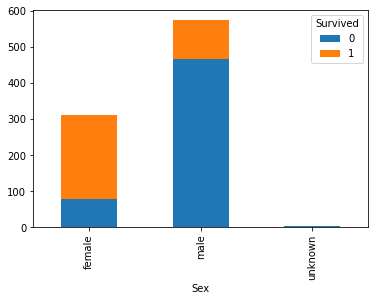

In [193]:
df.pivot_table('PassengerId', 'Sex', 'Survived', 'count').plot(kind='bar', stacked=True)
#Вывод из полученных гистограмм?

<AxesSubplot:xlabel='Pclass'>

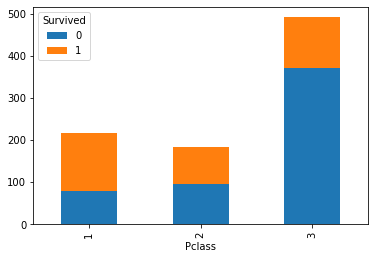

In [194]:
df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)
#Вывод из полученных гистограмм?

<AxesSubplot:xlabel='Parch'>

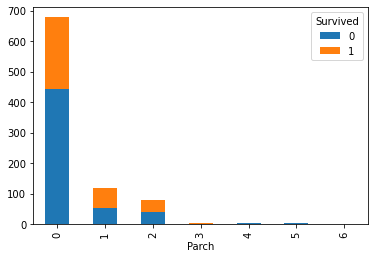

In [195]:
df.pivot_table('PassengerId', 'Parch', 'Survived', 'count').plot(kind='bar', stacked=True)
#Вывод из полученных гистограмм?

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

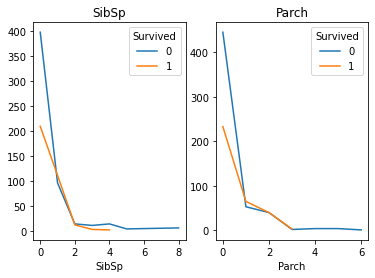

In [196]:
fig, axes = plt.subplots(ncols=2)
df.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
df.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

#Вывод?

<AxesSubplot:xlabel='PassengerId'>

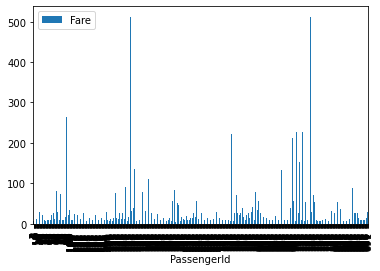

In [197]:
df.plot(x="PassengerId", y="Fare", kind="bar")

### Обработка и преобразование данных

In [198]:
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0      1   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [199]:
# преобразуем текстовый признак "Пол" в числовые значения
#df["DecodedSex"] = df["Sex"].map({"male":1, "female":-1, "unknown":0})

def f(x):
  if x == 'male':
    return 1
  elif x == 'female':
    return -1
  return 0

#df['DecodedSex'] = df['Sex'].apply(lambda x: f(x))

df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0      1   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [200]:
%%time 

df['DecodedSex'] = df['Sex'].apply(f)

df['DecodedSex'] = df['Sex'].map(f)

CPU times: user 2.68 ms, sys: 121 µs, total: 2.8 ms
Wall time: 2.67 ms


In [201]:
%%time

df["DecodedSex"] = df["Sex"].map({"male":1, "female":-1, "unknown":0})

CPU times: user 1.36 ms, sys: 0 ns, total: 1.36 ms
Wall time: 1.31 ms


In [202]:
# добавим еще одну характеристику для каждого объекта датасета
def fun(age):
    return age / 100

df["NewAge"] = df["Age"].apply(fun)
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0      1   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  DecodedSex  NewAge  
0      0  A/5 21171   7.2500   NaN        S           1    0.22  
1      0   PC 17599  71.2833   C85        C          -1    0.38

In [203]:
# то же самое можно сделатьс. помощью лямбда функции
df["NewAge"] = df["Age"].apply(lambda age: age/100)

In [204]:
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0      1   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  DecodedSex  NewAge  
0      0  A/5 21171   7.2500   NaN        S           1    0.22  
1      0   PC 17599  71.2833   C85        C          -1    0.38

In [205]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund; Mr. Owen Harris    male  22.0      1   
1    Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen; Miss. Laina  female  26.0      0   
3         Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen; Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila; Rev. Juozas    male  27.0      0   
887                       Graham; Miss. Margaret Edith  female  19.0      0   
888           Johnston; Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr; Mr. Karl Howell    male  26.0      0   
890                                Dooley; Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  DecodedSex  NewAge  
0        0         A/5 21171   7.2500   NaN        S           1    0.22  
1        0          PC 17599  71.2833   C85        C          -1    0.38  
2        0  STON/O2. 3101282   7.9250   NaN        S          -1    0.26  
3        0            113803  53.1000  C123        S          -1    0.35  
4        0            373450   8.0500   NaN        S           1    0.35  
..     ...               ...      ...   ...      ...         ...     ...  
886      0            211536  13.0000   NaN        S           1    0.27  
887      0            112053  30.0000   B42        S          -1    0.19  
888      2        W./C. 6607  23.4500   NaN        S          -1     NaN  
889      0            111369  30.0000  C148        C           1    0.26  
890      0            370376   7.7500   NaN        Q           1    0.32  

[891 rows x 14 columns]

In [206]:
# выделим фамилию из данных
df["Surname"] = df["Name"].apply(lambda name: name.split(";")[0]) # option1

In [207]:
df["Surname"] = df["Name"].apply(lambda name: name[:name.find(";")]) # p[tion 2]

In [208]:
df["Surname"].value_counts().head()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
Name: Surname, dtype: int64

In [209]:
df.values # df -> numpy.array

array([[1, 0, 3, ..., 1, 0.22, 'Braund'],
       [2, 1, 1, ..., -1, 0.38, 'Cumings'],
       [3, 1, 3, ..., -1, 0.26, 'Heikkinen'],
       ...,
       [889, 0, 3, ..., -1, nan, 'Johnston'],
       [890, 1, 1, ..., 1, 0.26, 'Behr'],
       [891, 0, 3, ..., 1, 0.32, 'Dooley']], dtype=object)

In [210]:
# Исследуем возраст пассажиров Титаника
df.groupby("Sex")["Age"].mean()

Sex
female     27.953846
male       30.774590
unknown    19.276667
Name: Age, dtype: float64

In [211]:
df.groupby("Sex")["Age"].apply(np.mean)

Sex
female     27.953846
male       30.774590
unknown    19.276667
Name: Age, dtype: float64

In [212]:
df.groupby("Sex")["Age"].apply(lambda ages: np.mean(ages)**2)

Sex
female     781.417515
male       947.075377
unknown    371.589878
Name: Age, dtype: float64

In [213]:
df.groupby("Survived")["Age"].apply(np.mean)

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [214]:
#группировка по нескольким столбцам и агрегация нескольких полей сразу
df.groupby(["Sex", "Pclass"]).agg(avg=('Age', 'mean'), avg_surv=('Survived', 'mean'))

avg  avg_surv
Sex     Pclass                     
female  1       34.611765  0.968085
        2       28.722973  0.921053
        3       21.787129  0.500000
male    1       41.281386  0.368852
        2       31.045918  0.149533
        3       26.458016  0.136232
unknown 2        0.830000  1.000000
        3       28.500000  0.250000

In [215]:
# .mean -> .count
# Сколько семей больше трех человек?
np.sum(df.groupby("Surname")["Name"].count() > 3)

22

In [216]:
# Сколько семей, в которых минимальный возраст меньше 10 лет?
np.sum(df.groupby("Surname")["Age"].apply(min) < 10)

39

In [217]:
# можно выделять объекты с помощью масок
# cоздание маски
(df["Age"]>10) & (df["Age"]<20)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [218]:
# пассажиры, удовлетворяющие условию
df.loc[(df["Age"]>10) & (df["Age"]<20)]

PassengerId  Survived  Pclass                                  Name  \
9             10         1       2   Nasser; Mrs. Nicholas (Adele Achem)   
14            15         0       3  Vestrom; Miss. Hulda Amanda Adolfina   
22            23         1       3           McGowan; Miss. Anna "Annie"   
27            28         0       1        Fortune; Mr. Charles Alexander   
38            39         0       3    Vander Planke; Miss. Augusta Maria   
..           ...       ...     ...                                   ...   
853          854         1       1             Lines; Miss. Mary Conover   
855          856         1       3            Aks; Mrs. Sam (Leah Rosen)   
875          876         1       3      Najib; Miss. Adele Kiamie "Jane"   
877          878         0       3                  Petroff; Mr. Nedelio   
887          888         1       1          Graham; Miss. Margaret Edith   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
9    female  14.0      1      0    237736   30.0708          NaN        C   
14   female  14.0      0      0    350406    7.8542          NaN        S   
22   female  15.0      0      0    330923    8.0292          NaN        Q   
27     male  19.0      3      2     19950  263.0000  C23 C25 C27        S   
38   female  18.0      2      0    345764   18.0000          NaN        S   
..      ...   ...    ...    ...       ...       ...          ...      ...   
853  female  16.0      0      1  PC 17592   39.4000          D28        S   
855  female  18.0      0      1    392091    9.3500          NaN        S   
875  female  15.0      0      0      2667    7.2250          NaN        C   
877    male  19.0      0      0    349212    7.8958          NaN        S   
887  female  19.0      0      0    112053   30.0000          B42        S   

     DecodedSex  NewAge        Surname  
9            -1    0.14         Nasser  
14           -1    0.14        Vestrom  
22           -1    0.15        McGowan  
27            1    0.19        Fortune  
38           -1    0.18  Vander Planke  
..          ...     ...            ...  
853          -1    0.16          Lines  
855          -1    0.18            Aks  
875          -1    0.15          Najib  
877           1    0.19        Petroff  
887          -1    0.19         Graham  

[100 rows x 15 columns]

### Доп материалы


[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

[10 Minutes To Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

[Pandas CookBook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

### Задания:

1. Какова доля семей, в которых минимальный возраст меньше 20 (семьи с детьми)?

In [219]:
# your code here

2. Какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?

In [ ]:
# your code here

3. Сколько пассажиров выжило, а сколько - нет?

In [ ]:
#your code here

4. Создайте столбец "IsChild", который равен 1, если возраст меньше 20, и 0 иначе. Для пропущенных значений поведение функции может быть произвольным.

In [ ]:
# your code here

5. Какова доля выживших женщин из первого класса? А доля выживших мужчин из 3 класса?

In [ ]:
# your code here